# Linear Regression to determine relationship between selling price and number of years.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb


In [3]:
car_data=pd.read_csv(r"C:\Users\shafat\Desktop\car dekho data.csv")

In [25]:
#overview of data
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [50]:
#X and Y variable
X=car_data.iloc[:,1:2].values
Y=car_data.iloc[:,2].values

In [51]:
X

array([[2014],
       [2014],
       [2006],
       ...,
       [2009],
       [2013],
       [2013]], dtype=int64)

In [69]:
#**********************************
#Assumption 1 of Simple Linear Regression
#1. The 2 variables X and Y need to be continous numeric, NOT categorical.
Xx=car_data.iloc[:,1:2].mean()
Yy=car_data.iloc[:,2].mean()

In [29]:
# By Inspecting the 2 variables X and Y, both are continous and Numeric
# Assumption 1 PASS

In [70]:
Xx

year    2013.804011
dtype: float64

**********************************
Assumption 2 of Simple Linear Regression
2. Data is free of Missing values,
if missing values are there MVT(Missing Value Treatment) need to be performed.

Below function checks for the missing values :)


In [67]:
def mmissing_count(Y):
    if np.count_nonzero(~np.isnan(Y))==len(Y):
        print ("No missing values")
    else:
        print("Missing value count is",len(Y)-np.count_nonzero(~np.isnan(Y)), "out of" ,len(Y))
    
mmissing_count(Y)
mmissing_count(X)

No missing values
No missing values


In [31]:
#assumption2 pass



Assumption 3 of Simple Linear Regression
3. Data should be free from outliers
If the  outliers are there take a business decision for removal @95% z=1.96 or @99.97% z=2.97

usually we take z =95% however in medical and other fields it can be taken as 99.97%


In [55]:
z = max(np.abs(stats.zscore(Y)))
print(z)


11.612111153166133


Assumption 4 of Simple Linear Regression
4. Linear relationship between X and Y
Correlation and covariabce would give the direction and the idea about linearity

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


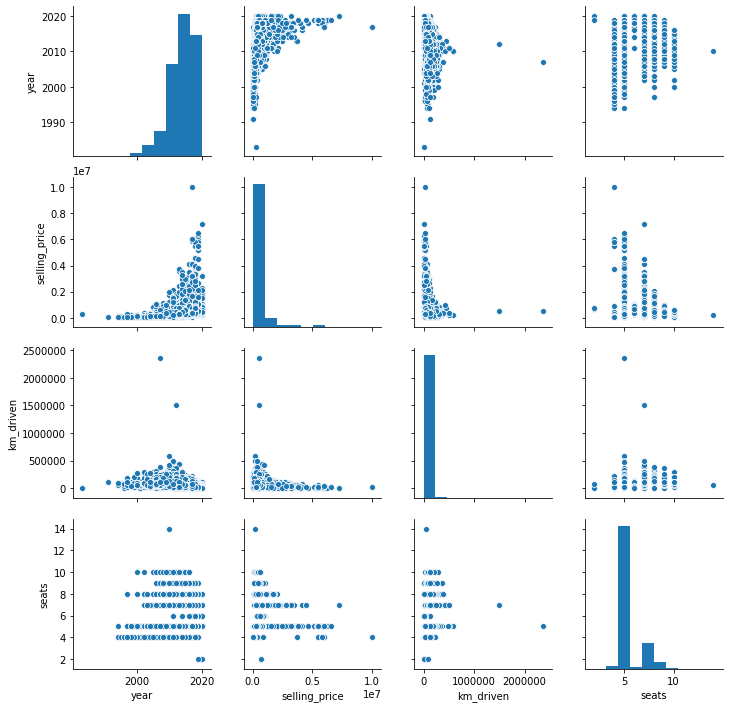

In [56]:
x=car_data['year'].values
y=car_data['selling_price'].values
np.corrcoef(x,y)
car_data.cov()
sb.pairplot(car_data)
# Assumption 4 PASS

In [57]:
np.corrcoef(x,y)

array([[1.        , 0.41409186],
       [0.41409186, 1.        ]])

In [58]:
car_data.cov()

,year,selling_price,km_driven,seats
year,1.635595e+01,1.350225e+06,-9.559975e+04,-0.033929
selling_price,1.350225e+06,6.500446e+11,-1.028300e+10,32287.176097
km_driven,-9.559975e+04,-1.028300e+10,3.197965e+09,12388.601623
seats,-3.392899e-02,3.228718e+04,1.238860e+04,0.920808


In [59]:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=0)

In [60]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
Y_predict=reg.predict(X_test)

In [61]:
print(reg.intercept_) # Nothing but the y intercept
print(reg.coef_) #Nothing but the coeffecient of X or the SLOPE


-164585259.280549
[82044.88069962]


In [65]:
Y_predict_val=reg.predict(np.array(2005).reshape(1,1))
print(Y_predict_val)

[-85273.47780246]


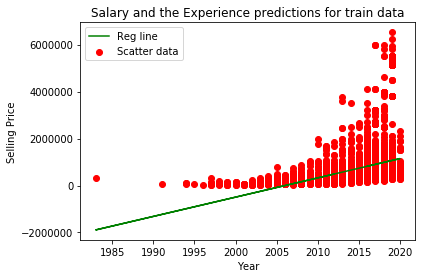

In [64]:
plt.scatter(X_train,Y_train,color='red',label="Scatter data")
plt.plot(X_train,reg.predict(X_train),c='green',label="Reg line")
#Giving title to the plot for making it look better, also giving labels to X and Y axis
plt.title('Salary and the Experience predictions for train data')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.legend()
plt.show() 

In [66]:
from sklearn import metrics

#1. Result for MAE (Mean Absolute Error) >> The formula is avg(|y-yhat|)
print(metrics.mean_absolute_error(Y_test,Y_predict))

#2. Result for MSE (Mean Squared Error) >> The formula is avg(|(y-yhat)**2|)
print(metrics.mean_squared_error(Y_test,Y_predict))

#3. Let's calculate the RMSE from scartch, RMSE is also a measure of the goodness of fit of a model.
#The RMSE of $4585.41 is not bad and the model is predicting salaries to a good extent
rss=((Y_test-Y_predict)**2).sum() #residual sum of squares or the SSE (Sum squared errors)..just like Variance
mse=np.mean((Y_test-Y_predict)**2) #mean square error just like the standdard deviation or sigma
print(f"Final rmse value is :{np.sqrt(mse)}")

#3.1 Another way for RMSE, check from above calculation, the values match
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))

#4. Calculating the R square and printing it for the goodness of fit, it come out to be 93.8%
#The variation that can be explained by this model is 93.8%
#reg is the LinearRegression() object
r2_score=reg.score(X_train,Y_train)
print(r2_score) 

385361.2315407109
547212640141.88837
Final rmse value is :739738.2240643566
739738.2240643566
0.1745190760452221
